In [ ]:
import numpy as np
import cv2

In [ ]:
prototxt_path = "/content/colorization_deploy_v2.prototxt"
model_path = "/content/drive/MyDrive/others/colorization_release_v2.caffemodel"
kernel_path = "/content/pts_in_hull.npy"
image_path = "/content/old.jpg"

In [ ]:
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
points = np.load(kernel_path)

In [ ]:
points = points.transpose().reshape(2,313,1,1)
net.getLayer(net.getLayerId("class8_ab")).blobs = [points.astype(np.float32)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1,313], 2.606, dtype="float32")]
#net.getLayer(net.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, np.float32)]

In [ ]:
bw_image = cv2.imread(image_path)
normalized = bw_image.astype("float32") / 255.0
lab = cv2.cvtColor(normalized, cv2.COLOR_BGR2LAB)

resized = cv2.resize(lab, (224,224))
L = cv2.split(resized)[0]
L -= 50
# img_rs = cv.resize(img_rgb, (W_in, H_in))
# img_lab_rs = cv.cvtColor(img_rs, cv.COLOR_RGB2Lab)
# img_l_rs = img_lab_rs[:,:,0]
# img_l_rs -= 50

In [ ]:
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0,:,:,:].transpose((1,2,0))

In [ ]:
ab = cv2.resize(ab, (bw_image.shape[1], bw_image.shape[0]))
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:,:,np.newaxis], ab), axis=2)
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = (255.0 * colorized).astype("uint8")

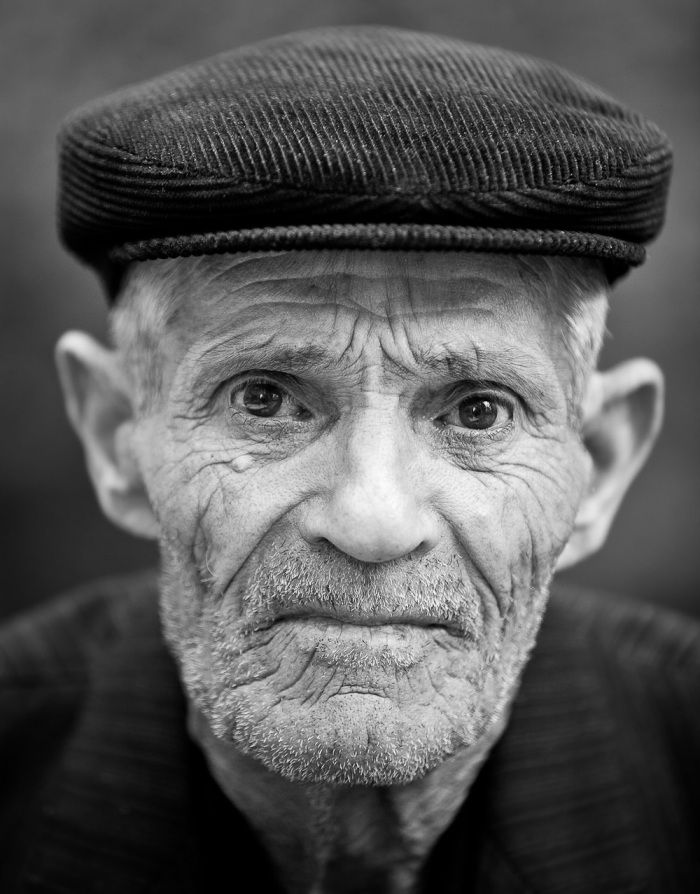

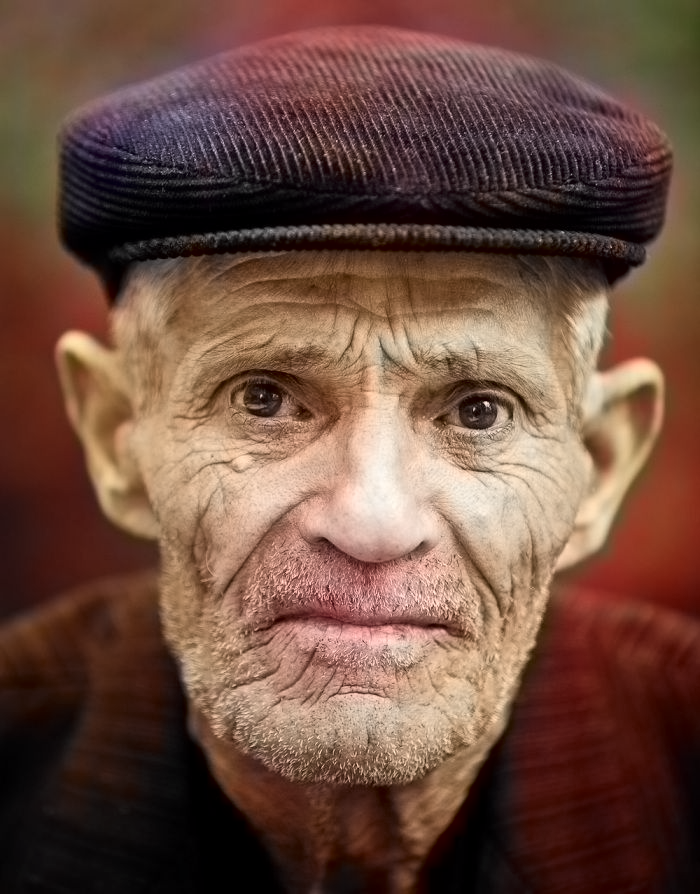

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(bw_image)
cv2_imshow(colorized)

In [ ]:
im = Image.fromarray((X * 255).astype(np.uint8))

TypeError: ignored

In [ ]:
print(results)